In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set_style("whitegrid")
plt.rc('font', size=14)

In [2]:
df_data = pd.read_csv("../processed_data/1_processed_data.csv")
df_data.head()

,Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,Maximiliano-Cárdenas-Catelicán,1,Insecure,Average Quality,Male,20.076728,31.719207,23.453752,25.016903,2,3.884615,21.765240,28.368055,6.602815
1,Martín-Pérez-González,4,Secure,Average Quality,Male,28.584920,82.400761,28.361209,19.363161,3,3.807692,28.473065,50.881961,22.408896
2,Noemí-Cárdenas-Gutierrez,5,Secure,Average Quality,Female,161.424693,46.867951,39.006348,52.728307,5,3.807692,100.215520,49.798129,-50.417391
3,Jasna-Mansilla-Mansilla,7,Insecure,Average Quality,Female,26.747838,47.213491,21.599136,35.942378,1,3.846154,24.173487,41.577934,17.404447
4,Jhampiere-Largacha-Yañez,11,NaN,Average Quality,Male,118.901337,47.213491,37.125222,382.715268,5,3.961538,78.013279,214.964380,136.951100


In [3]:
df_data_cortisol = pd.read_csv("../raw_data/cortisol/raw_data_measures.csv")
df_data_cortisol

,Sample,Cortisol (pg/mL),Attachment
0,38,4.21,Secure
1,16,3.59,Secure
2,32,22.75,Secure
3,1,5.62,Insecure
4,7,1.83,Insecure
5,39,3.07,Insecure
6,5,2.28,Secure
7,63,7.08,Insecure
8,27,2.26,Secure
9,23,4.76,Secure


In [4]:
palette_values = ['#026E81', '#00ABBD', '#0099DD', '#FF9933', '#A1C7E0']
colors = sns.color_palette(palette_values)

<Axes: ylabel='Cortisol (pg/mL)'>

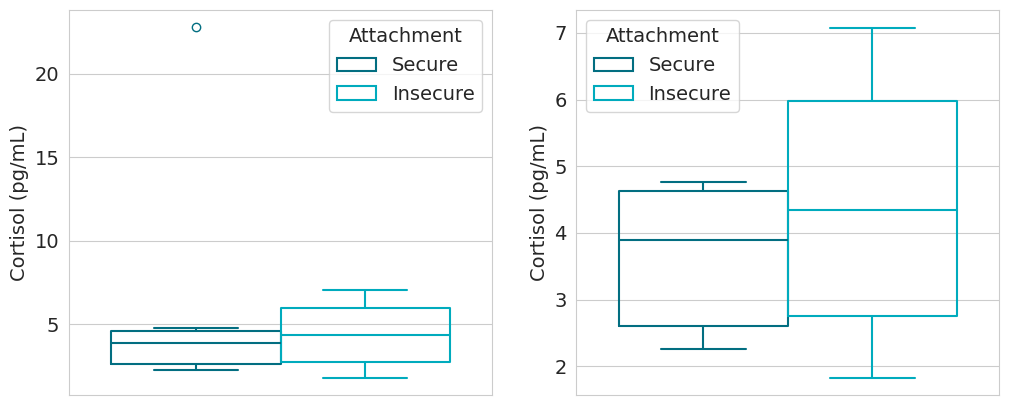

In [5]:
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, figure=fig)

ax_data1 = fig.add_subplot(gs[0])
ax_data2 = fig.add_subplot(gs[1])

sns.boxplot(ax=ax_data1, data=df_data_cortisol, y="Cortisol (pg/mL)", hue="Attachment", fill=False, palette=colors)
sns.boxplot(ax=ax_data2, data=df_data_cortisol, y="Cortisol (pg/mL)", hue="Attachment", fill=False, palette=colors, showfliers=False)


In [ ]:
df_data_cortisol = df_data_cortisol[df_data_cortisol["Cortisol (pg/mL)"]<20]
df_data_cortisol

,Sample,Cortisol (pg/mL),Attachment
0,38,4.21,Secure
1,16,3.59,Secure
3,1,5.62,Insecure
4,7,1.83,Insecure
5,39,3.07,Insecure
6,5,2.28,Secure
7,63,7.08,Insecure
8,27,2.26,Secure
9,23,4.76,Secure


In [7]:
df_merge = df_data_cortisol.merge(right=df_data, left_on="Sample", right_on="ID")
df_merge = df_merge.drop(columns=["Attachment_x"])
df_merge.rename(columns={"Attachment_y": "Attachment"}, inplace=True)
df_merge

,Sample,Cortisol (pg/mL),Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,16,3.59,Danna-Merkle-Vargas,16,Secure,Average Quality,Female,79.173752,108.512940,35.780159,39.270931,3,2.307692,57.476955,73.891936,16.414980
1,1,5.62,Maximiliano-Cárdenas-Catelicán,1,Insecure,Average Quality,Male,20.076728,31.719207,23.453752,25.016903,2,3.884615,21.765240,28.368055,6.602815
2,7,1.83,Jasna-Mansilla-Mansilla,7,Insecure,Average Quality,Female,26.747838,47.213491,21.599136,35.942378,1,3.846154,24.173487,41.577934,17.404447
3,5,2.28,Noemí-Cárdenas-Gutierrez,5,Secure,Average Quality,Female,161.424693,46.867951,39.006348,52.728307,5,3.807692,100.215520,49.798129,-50.417391
4,63,7.08,José-Santos-Ramírez,63,Insecure,Average Quality,Male,24.012107,21.808747,28.427144,18.324096,1,3.884615,26.219626,20.066422,-6.153204
5,27,2.26,Isabella-Oyarzún-Villalobos,27,Secure,Low Quality,Female,53.147518,37.759187,34.127202,52.728307,3,3.269231,43.637360,45.243747,1.606387
6,23,4.76,María-Levet-Espinoza,23,Secure,Average Quality,Female,78.975857,56.250589,82.673910,39.015096,4,3.692308,80.824884,47.632842,-33.192041


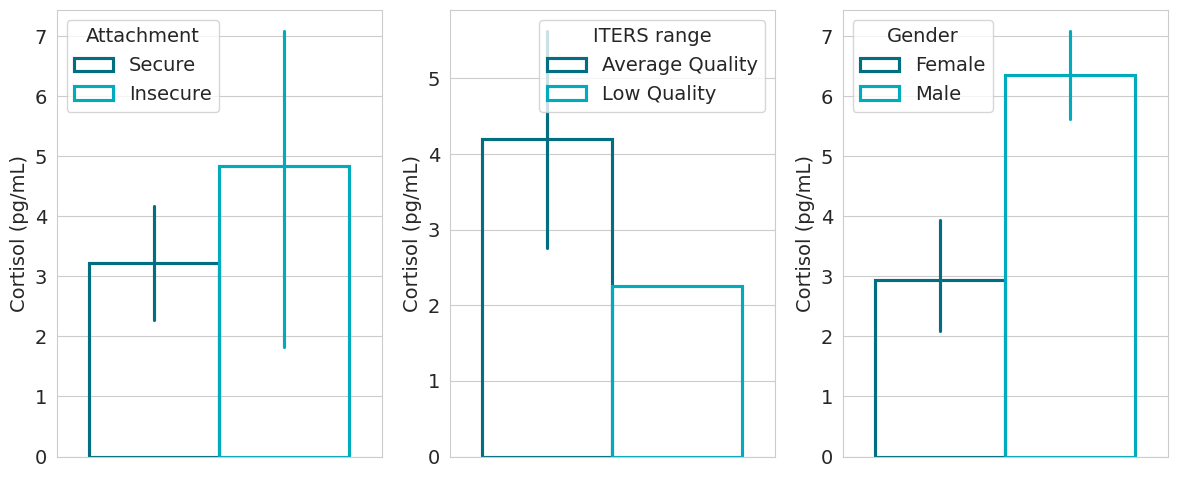

In [12]:
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 3, figure=fig)

ax_data1 = fig.add_subplot(gs[0])
ax_data2 = fig.add_subplot(gs[1])
ax_data3 = fig.add_subplot(gs[2])

sns.barplot(ax=ax_data1, data=df_merge, y="Cortisol (pg/mL)", hue="Attachment", fill=False, palette=colors)
sns.barplot(ax=ax_data2, data=df_merge, y="Cortisol (pg/mL)", hue="ITERS range", fill=False, palette=colors)
sns.barplot(ax=ax_data3, data=df_merge, y="Cortisol (pg/mL)", hue="Gender", fill=False, palette=colors)

plt.tight_layout()

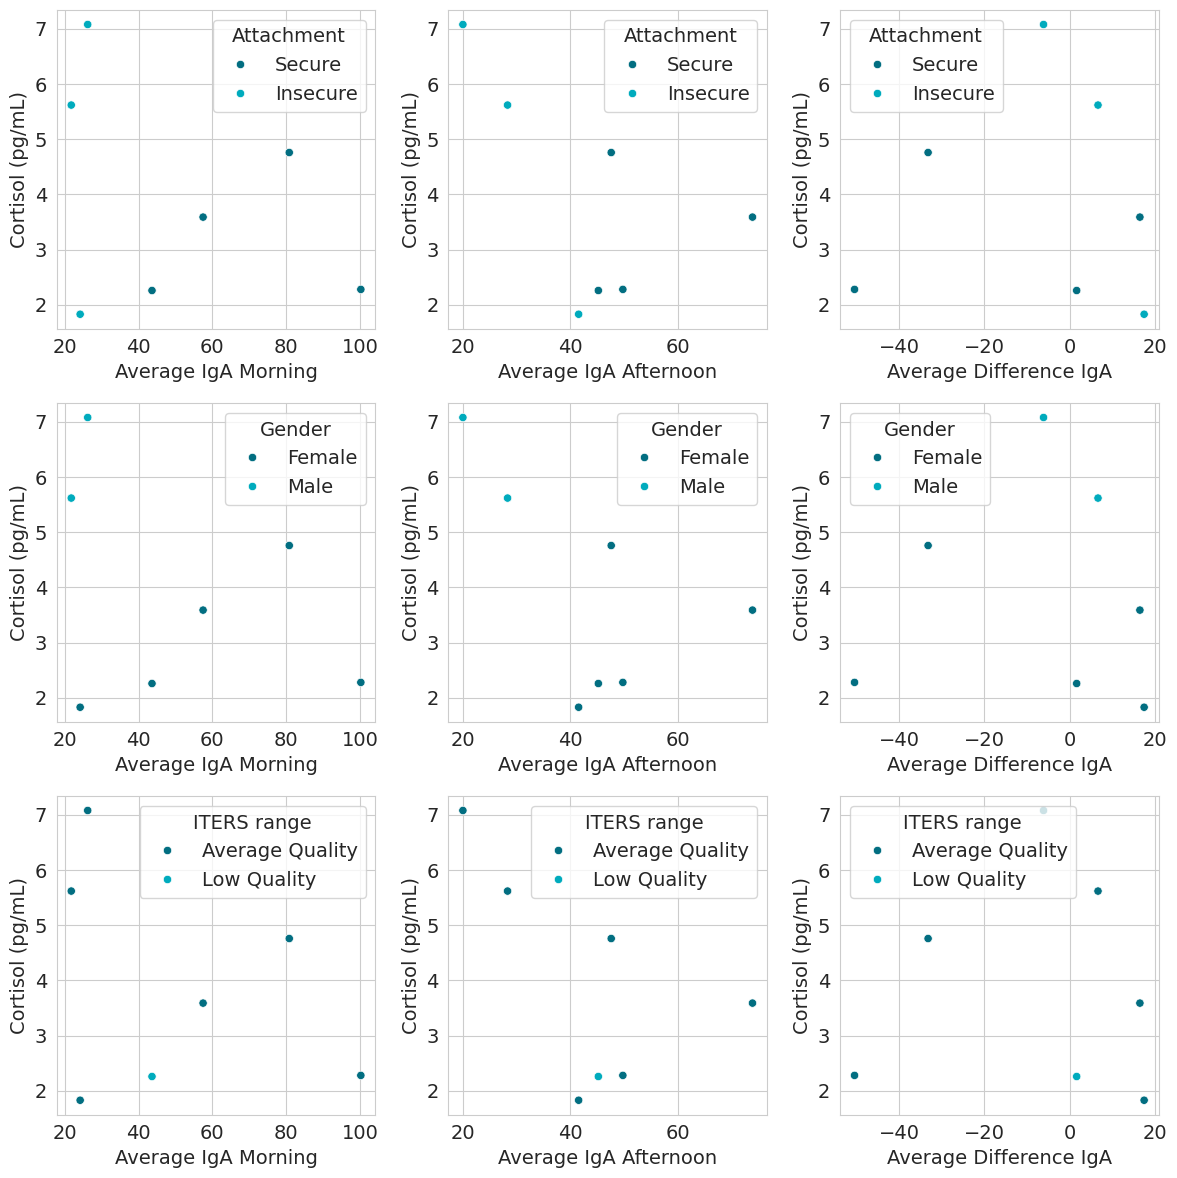

In [13]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 3, figure=fig)

ax_data1 = fig.add_subplot(gs[0, 0])
ax_data2 = fig.add_subplot(gs[0, 1])
ax_data3 = fig.add_subplot(gs[0, 2])

ax_data4 = fig.add_subplot(gs[1, 0])
ax_data5 = fig.add_subplot(gs[1, 1])
ax_data6 = fig.add_subplot(gs[1, 2])

ax_data7 = fig.add_subplot(gs[2, 0])
ax_data8 = fig.add_subplot(gs[2, 1])
ax_data9 = fig.add_subplot(gs[2, 2])

sns.scatterplot(ax=ax_data1, data=df_merge, hue="Attachment", x="Average IgA Morning", y="Cortisol (pg/mL)", palette=colors)
sns.scatterplot(ax=ax_data2, data=df_merge, hue="Attachment", x="Average IgA Afternoon", y="Cortisol (pg/mL)", palette=colors)
sns.scatterplot(ax=ax_data3, data=df_merge, hue="Attachment", x="Average Difference IgA", y="Cortisol (pg/mL)", palette=colors)

sns.scatterplot(ax=ax_data4, data=df_merge, hue="Gender", x="Average IgA Morning", y="Cortisol (pg/mL)", palette=colors)
sns.scatterplot(ax=ax_data5, data=df_merge, hue="Gender", x="Average IgA Afternoon", y="Cortisol (pg/mL)", palette=colors)
sns.scatterplot(ax=ax_data6, data=df_merge, hue="Gender", x="Average Difference IgA", y="Cortisol (pg/mL)", palette=colors)

sns.scatterplot(ax=ax_data7, data=df_merge, hue="ITERS range", x="Average IgA Morning", y="Cortisol (pg/mL)", palette=colors)
sns.scatterplot(ax=ax_data8, data=df_merge, hue="ITERS range", x="Average IgA Afternoon", y="Cortisol (pg/mL)", palette=colors)
sns.scatterplot(ax=ax_data9, data=df_merge, hue="ITERS range", x="Average Difference IgA", y="Cortisol (pg/mL)", palette=colors)

plt.tight_layout()

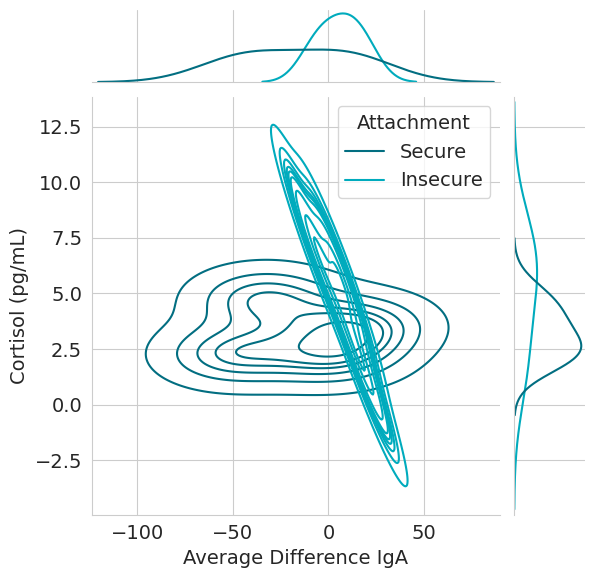

In [10]:
sns.jointplot(data=df_merge, hue="Attachment", x="Average Difference IgA", y="Cortisol (pg/mL)", palette=colors, kind='kde')
